### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [4]:
df = pd.read_csv(r"C:\Users\Gopi Reddy\NIT7PM\APR\ML Classification\8.Light bgm Classification\Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.shape 

(569, 6)

In [ ]:
df.info() # to check the data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
df.count() # to check the number of non-null values in each column

mean_radius        569
mean_texture       569
mean_perimeter     569
mean_area          569
mean_smoothness    569
diagnosis          569
dtype: int64

In [8]:
df['diagnosis'].value_counts() # to check the distribution of target variable

diagnosis
1    357
0    212
Name: count, dtype: int64

> The target variable is diagnosis.it contains 2 values 0 and 1
> 0 is for negetive prediction and 1 for positive prediction

### Declare Feature Vector and Target Variable

In [9]:
X = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
y = df['diagnosis']

In [10]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

### Split the data into train and test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Built a LGBM classifier Model

In [14]:
import lightgbm as lgb

cls = lgb.LGBMClassifier()
cls.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 249, number of negative: 149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625628 -> initscore=0.513507
[LightGBM] [Info] Start training from score 0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier()

### Model Prediction based on test data

In [15]:
y_pred = cls.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9298


### Compare the train and test score accuracy

In [19]:
y_pred_train = cls.predict(X_train)
print('Training set accuracy is: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training set accuracy is: 1.0000


### Check for overfitting

In [20]:
print('Training set accuracy (Bias): {0:0.4f}'.format(cls.score(X_train, y_train)))
print('Testing set accuracy (Variance): {0:0.4f}'.format(cls.score(X_test, y_test)))

Training set accuracy (Bias): 1.0000
Testing set accuracy (Variance): 0.9298


The training and test set accuracy are quite comparable.So we cannot say there is overfitting

In [21]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('\n True Positive (TP):', cm[0, 0])
print('True Negetive (TN):', cm[1, 1])
print('False Positive (FP):', cm[0, 1])
print('False Negetive (FN):', cm[1, 0])

Confusion matrix:
 [[ 55   8]
 [  4 104]]

 True Positive (TP): 55
True Negetive (TN): 104
False Positive (FP): 8
False Negetive (FN): 4


In [22]:
# Classification Metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        63
           1       0.93      0.96      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



### Visualize the confusion matrix with seaborn Heatmap

<Axes: >

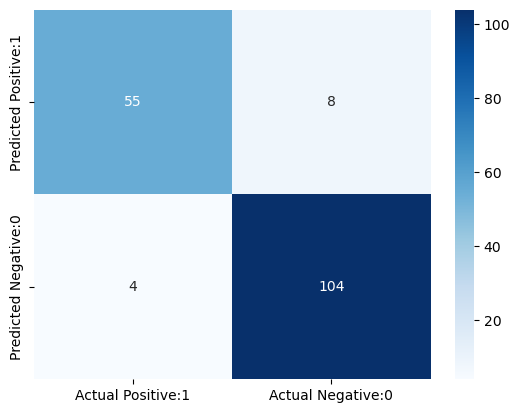

In [23]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                        index=['Predicted Positive:1', 'Predicted Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')